# H2HBABBA2717
### Abhishek Srivastava
### House Richard
#### SRM Institute of Science and Technology

#### Steps to implement:

Milestone 1:
Basic data pre-processing and data cleaning.

Exploratory data analysis.

Milestone 2:
Feature engineering and feature selection.

Milestone 3:
Model building and hyperparameter tuning.

Predicting payment date on unseen data.

Bucketizing delay in payment date according to PRS.

### Importing critical libraries

In [1]:
import pandas as pd #pandas:data processing
import numpy as np #numpy:mathematical processing
import matplotlib.pyplot as plt #matplotlib:data visualization
import sklearn #sklearn:feature selection,model building
import seaborn as sns #seaborn:data visualization
from sklearn import * #sklearn:feature selection,model building
from sklearn.model_selection import train_test_split #train_test_split:Splitting the dataset
from sklearn.preprocessing import LabelEncoder #LabelEncoder:Encoding
from sklearn.feature_selection import f_regression #f_regression:feature selection
from sklearn.feature_selection import mutual_info_regression #mutual_info_regression:feature selection
from sklearn.feature_selection import SelectKBest #SelectKbest:feature selection
from sklearn.ensemble import RandomForestRegressor #RandomForrestRegressor:feature selection and model building
from sklearn.metrics import mean_squared_error #mean_squared_error:metrics for model
from sklearn.metrics import r2_score #r2_score:metrics for model
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearchCV:hyperparameter tuning
from numpy import linspace #linspace:mathematical processing

Matplotlib is building the font cache; this may take a moment.


In [2]:
import warnings 
warnings.filterwarnings("ignore") #filtering warnings
pd.set_option('display.max_columns',200) #can display 200 columns using pandas
pd.set_option('display.max_rows',200) #can display 200 rows using pandas

In [3]:
df=pd.read_csv('df.csv') #importing data from local directory as df
df.head() #displaying first 5 rows of dataframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U002,0200501669,WAL MA foundation,2019-12-12 00:00:00,2019.0,1.990569e+09,2019-11-01,20191031,20191101,20191206.0,USD,RV,1.0,NaN,15726.41,20191101.0,NAG2,1.990569e+09,0
1,U001,0200416837,DEC us,2019-04-01 00:00:00,2019.0,1.928996e+09,2019-03-20,20190320,20190320,20190408.0,USD,RV,1.0,NaN,12102.50,20190316.0,NAM4,1.928996e+09,0
2,U001,0200769623,WAL-MAR llc,2019-05-20 00:00:00,2019.0,1.929236e+09,2019-05-01,20190501,20190501,20190516.0,USD,RV,1.0,NaN,16192.53,20190501.0,NAH4,1.929236e+09,0
3,CA02,0140106408,WAL-M trust,2019-12-05 00:00:00,2019.0,2.960594e+09,2019-11-16,20191117,20191116,20191126.0,CAD,RV,1.0,NaN,103469.02,20191116.0,CA10,2.960594e+09,0
4,U001,0200785971,SYSCO corp,2019-06-21 00:00:00,2019.0,1.929433e+09,2019-06-05,20190604,20190605,20190620.0,USD,RV,1.0,NaN,3911.38,20190605.0,NAA8,1.929433e+09,0


# Milestone-1 
## Data pre-processing and cleaning

### Converting all date columns to datetime format

In [4]:
df['posting_date']=pd.to_datetime(df['posting_date'])#posting_date
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')#document_creat_date
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')#document_create_date.1
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')#due_in_date
df['buisness_year']=pd.to_datetime(df['buisness_year'],format='%Y')#buisness_year
df['buisness_year']=pd.DatetimeIndex(df['buisness_year']).year
df['clear_date']=pd.to_datetime(df['clear_date'])#clear_date

### Dropping duplicate rows in dataframe

In [5]:
df=df.drop_duplicates(keep='first')

### Null Imputation

In [6]:
df.isna().sum() #Checking for null values in dataframe

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 9701
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             48808
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [7]:
df[df['invoice_id'].isnull()] #2 null values in invoice_id

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4272,CA02,0140106054,TREE trust,2019-05-31,2019,9.500000e+09,2019-03-29,2019-03-29,2019-03-07,2019-03-17,CAD,X2,1.0,NaN,1751.14,20190307.0,CA10,NaN,0
48896,CA02,0140106054,TREE in,2019-05-06,2019,9.500000e+09,2019-03-29,2019-03-29,2019-01-28,2019-02-07,CAD,X2,1.0,NaN,12636.00,20190128.0,CA10,NaN,0


In [8]:
df=df[df['invoice_id'].isnull()==False] #dropping 2 rows with null values in invoice_id

In [9]:
df.isnull().sum() #No null values present in invoice_id but 48806 null values in area_business

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 9701
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             48806
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [10]:
df.shape #area_business is a null column

(48806, 19)

In [11]:
df=df.drop(['area_business'],axis=1) #dropping area_business as it is a null column

### Constant columns and duplicate columns

In [12]:
df.nunique() #checking for number of unique categoris in each column

business_code                 6
cust_number                1403
name_customer              4162
clear_date                  395
buisness_year                 2
doc_id                    48806
posting_date                503
document_create_date        505
document_create_date.1      503
due_in_date                 544
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44210
baseline_create_date        503
cust_payment_terms           72
invoice_id                48806
isOpen                        2
dtype: int64

In [13]:
df=df.drop(['document type','posting_id'],axis=1) #dropping document type and posting_id as it is a constant column

#### Checking for duplicate columns
Since I removed duplicate rows so KeyError is supposed to raised if we try to run a for loop for each index.So I did exception handling and checked for each index value of columns.Here after running the cells I observed that document_create_date.1,baseline_create_dates and posting_date are completely equal.Invoice_id and doc_id are also completely equal.

In [14]:
keyerrorcounter=0 #counting numbers of KeyErrors
for x in range(df.shape[0]):
    try:
        if (df['document_create_date.1'][x]!=df['posting_date'][x]):
            print ("At",x,"column values are not equal") #If value is equal at any index then it will print this
    except KeyError:
        keyerrorcounter=keyerrorcounter+1 #counting number of KeyErrors raised
print("Keyerror for",keyerrorcounter,"values")

Keyerror for 1131 values


In [15]:
keyerrorcounter=0
for x in range(df.shape[0]):
    try:
        if (df['document_create_date.1'][x]!=df['baseline_create_dates'][x]):
            print ("At",x,"column values are not equal")#If value is equal at any index then it will print this
    except KeyError:
        keyerrorcounter=keyerrorcounter+1#counting number of KeyErrors raised
print("Keyerror for",keyerrorcounter,"values")

Keyerror for 48806 values


In [16]:
keyerrorcounter=0
for x in range(df.shape[0]):
    try:
        if (df['invoice_id'][x]!=df['doc_id'][x]):
            print ("At",x,"column values are not equal")#If value is equal at any index then it will print this
    except KeyError:
        keyerrorcounter=keyerrorcounter+1#counting number of KeyErrors raised
print("Keyerror for",keyerrorcounter,"values")

Keyerror for 1131 values


In [17]:
df=df.drop(['document_create_date.1','baseline_create_date','doc_id'],axis=1) #dropping duplicate columns

In [18]:
df.head() #displaying dataframe after cleaning

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen
0,U002,0200501669,WAL MA foundation,2019-12-12,2019,2019-11-01,2019-10-31,2019-12-06,USD,15726.41,NAG2,1.990569e+09,0
1,U001,0200416837,DEC us,2019-04-01,2019,2019-03-20,2019-03-20,2019-04-08,USD,12102.50,NAM4,1.928996e+09,0
2,U001,0200769623,WAL-MAR llc,2019-05-20,2019,2019-05-01,2019-05-01,2019-05-16,USD,16192.53,NAH4,1.929236e+09,0
3,CA02,0140106408,WAL-M trust,2019-12-05,2019,2019-11-16,2019-11-17,2019-11-26,CAD,103469.02,CA10,2.960594e+09,0
4,U001,0200785971,SYSCO corp,2019-06-21,2019,2019-06-05,2019-06-04,2019-06-20,USD,3911.38,NAA8,1.929433e+09,0


## Data Splitting and EDA

### Splitting data in Main training data and main testing data
Here first data will be splitted into two steps: First step is to split the data into main training data and main testing data.Then the second step is to split the main training data into training,validation and testing datasets.

In [19]:
df_train=df[df['isOpen']!=1] #Training data where isOpen is not equal to 1 as we know clear_date here
df_test=df[df['isOpen']==1] #Testing data where isOpen is equal to 1 as we want to predict clear_date here

In [20]:
df_train['isOpen'].nunique()#Now isOpen is having constant values hence it is a constant column now

1

#### Delay column
Creating a new column as 'Delay' in main training dataset which is delay(in days) in payment.Hence it can be calculated by subtracting clear date of payment from due date of payment

In [21]:
#creating delay column and converting it to days format and then typecasting it as int16 for further calculations
df_train['Delay']=(df_train['due_in_date']-df_train['clear_date']).dt.days.astype('int16')

In [22]:
type(df_train['Delay'][0]) #conforming data type of Delay column

numpy.int16

#### Categorical Variables
In this part I tried to reduce cardinality of few high cardinality categorical columns by clubbing less frequent and less occuring categories into a single category.

In [23]:
#Checking number of counts for each category in business_code column
##As we can see U002,U005 and U007 are having very less count as compared to other categories so I clubbed into a single category
df_train.business_code.value_counts()

U001    35381
CA02     3084
U013      490
U002      124
U005       24
U007        2
Name: business_code, dtype: int64

In [24]:
#Clubbing less frequent categories into Business_code_others using np.where(condition,x if true,y if false)
df_train['business_code']=np.where(df_train['business_code'].isin(['U002','U005','U007']),'Business_code_others',df_train['business_code'])

In [25]:
df_train.business_code.value_counts()#Checking count of categories now

U001                    35381
CA02                     3084
U013                      490
Business_code_others      150
Name: business_code, dtype: int64

In [26]:
df_train.invoice_currency.value_counts()#Clubbing of categories is not needed here

USD    36020
CAD     3085
Name: invoice_currency, dtype: int64

In [27]:
#Since the number of categories is high here so converted it to a dataframe and analysed different categories and their counts
num=pd.DataFrame(df_train['cust_payment_terms'].value_counts())

In [28]:
num.head(1)#displaying categories and their counts

,cust_payment_terms
NAA8,15617


In [29]:
#After finding out number of less frequent categories clubbed them in one single category
df_train['cust_payment_terms']=np.where(df_train['cust_payment_terms'].isin(['C129','NATV','NATL','NAV2','NA31','NAUX',
                                                                            'NATZ','NACE','NAUI','NATY','B052','NATW',
                                                                            'NAD8','NAV9','NAWM','NATU','NATH','NAUW',
                                                                            'NATK','NA8Q','NATX','NANC','NATJ','NA25',
                                                                            '90M7','NAVC','NAUP','NA9X','CAB1','NAM3',
                                                                            'BR56','NA3F','NAWN','NAVR','NAWP','NAUZ',
                                                                            'NACB','CA30','NABG','NA38','NA3B','NAVM',
                                                                            'NAD4','C106','NAVL','NAB1','NAVD','NA84']),'C_P_Others',
                                                                            df_train['cust_payment_terms'])

In [30]:
df_train.nunique()#As we can see some cardinality is reduced

business_code               4
cust_number              1327
name_customer            3873
clear_date                395
buisness_year               2
posting_date              422
document_create_date      426
due_in_date               492
invoice_currency            2
total_open_amount       35550
cust_payment_terms         22
invoice_id              39105
isOpen                      1
Delay                     181
dtype: int64

#### Sorting the data
Sorting of data on basis of posting_date is done so that splitting of main training dataset can be done according to date of invoices.As on first 70% of data I will train the model and it will learn from this 70% data then next 15% will be validation dataset on which hyperparameter tuning will be performed and the last 15% will be testing dataset on which accuracy will be checked.Sorting on basis of date is required as in the end we are predicting payment date so it is better to train the data on first occuring dates in our dataframe and test the data on the other part of the data on the dates which are not fed into model.

In [31]:
df_train=df_train.sort_values(by="posting_date")#Sorting data by posting_date

In [32]:
df_train.head() #Displaying sorted dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen,Delay
10848,U001,0200769623,WAL-MAR co,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,50701.55,NAH4,1.928541e+09,0,5
37396,U001,0200759878,SA in,2019-01-22,2019,2018-12-30,2018-12-29,2019-01-14,USD,28664.38,NAH4,1.928534e+09,0,-8
45926,U001,0200726979,BJ'S in,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,58.18,NAA8,1.928540e+09,0,-1
9620,U001,0100001196,DOLLAR corporation,2019-01-18,2019,2018-12-30,2018-12-31,2019-01-14,USD,671.90,NAA8,1.928531e+09,0,-4
27571,U001,0200769623,WAL-MAR systems,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,72920.35,NAH4,1.928542e+09,0,5


#### Seperating dataset into X and y
In this part I am seperating target vector and features into y and X as feature engineering and selection will mainly be done on features.

In [33]:
X=df_train.drop(['Delay'],axis=1)#dropping target vector from df and assigning it to X

In [34]:
y=df_train['Delay'] #Assigning Delay column to y which is our target vector
y.columns=['Delay']

In [35]:
X.head() #Displaying Feature dataset 

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen
10848,U001,0200769623,WAL-MAR co,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,50701.55,NAH4,1.928541e+09,0
37396,U001,0200759878,SA in,2019-01-22,2019,2018-12-30,2018-12-29,2019-01-14,USD,28664.38,NAH4,1.928534e+09,0
45926,U001,0200726979,BJ'S in,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,58.18,NAA8,1.928540e+09,0
9620,U001,0100001196,DOLLAR corporation,2019-01-18,2019,2018-12-30,2018-12-31,2019-01-14,USD,671.90,NAA8,1.928531e+09,0
27571,U001,0200769623,WAL-MAR systems,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,72920.35,NAH4,1.928542e+09,0


In [36]:
y.head() #Displaying target vector

10848    5
37396   -8
45926   -1
9620    -4
27571    5
Name: Delay, dtype: int16

#### train_test_split
Now here splitting features and target vector into training , validation and testing dataset.First splitting the dataset into train and inter_test as train will be our training dataset and inter_test will be our validation and testing dataset combined.


Then inter_test will be splitted into validation and testing dataset.
test_size=0.3 and 0.5 as first 70% of dataset is assigned for training and then 50% of 30% of dataset is assigned to validation and testing dataset.



Here random_state is 0 as everytime after splitting same values will be selected and shuffle is False as data should be splitted sequentially.

In [37]:
#Splitting X and y into train ,validation and testing datasets.
X_train,X_inter_test,y_train,y_inter_test=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)
X_val,X_test,y_val,y_test=train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0,shuffle=False)

In [38]:
#Checking shapes of train,test and validation datasets 
#As we can see dimensions of val and test are same hence it is splitted equally.
X_train.shape,X_test.shape,X_val.shape

((27373, 13), (5866, 13), (5866, 13))

### Exploratory Data Analysis

#### Checking for outliers
Outliers can sometimes cause the model to perform with less accuracy hence it is an essential step of EDA.But sometime outliers are essential as maybe there could be some underlying reason why that particular outlier exist

<AxesSubplot:xlabel='Delay'>

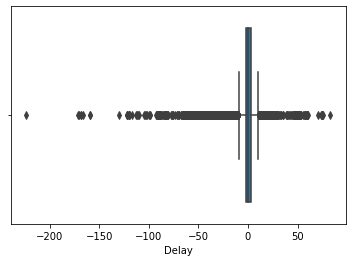

In [39]:
#Checking for outliers in target vector.No essential outliers detected as existing outliers might be special cases for some clients
sns.boxplot(y_train)

#### Checking distributions
Distribution of target vector and other features plays an important role in EDA as it tells us how efficient our model might work.If the variance of target vector is too high then it migh be tough for model to learn the underlying patterns as it has to cover a lot of points but if the variance not that high and in our case variance in not that high so chances are there that it will be a bit easy for model to learn the underlying patterns.

<AxesSubplot:xlabel='Delay', ylabel='Density'>

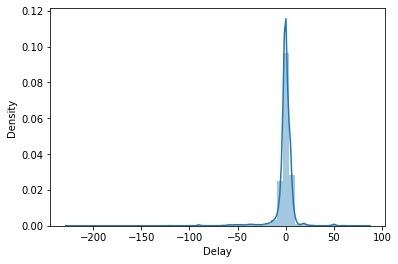

In [40]:
sns.distplot(y_train)#Distribution of target vector

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

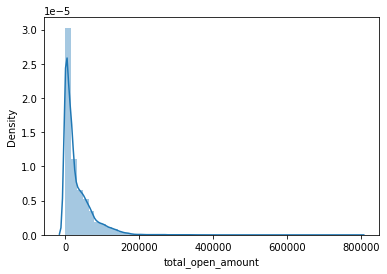

In [41]:
sns.distplot((X_train['total_open_amount']))#Distribution of total_open_amount is higly skewed
#log transformation of this distribution can return with normal distribution hence that distribution can be useful for model.

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

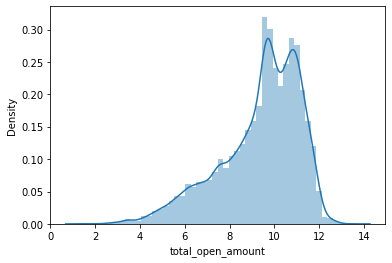

In [42]:
#Now we can see distribution changed from highly skewed to somewhat normal distribution
sns.distplot(np.log(X_train['total_open_amount']))

#### Statistics
.describe() is used for displaying statistics of a dataframe.Till now I performed basic data pre-processing,cleaning and exploratory data analysis to analyse underlying patterns in the data.


Now in statistics of training dataset it is visible that not many columns are there to provide some crucial insights of the data so now feature engineering steps are required as there are many categorical columns and date columns in the dataset.

In [43]:
X_train.describe()#displaying essential statistics of training dataset

,buisness_year,total_open_amount,invoice_id,isOpen
count,27373.0,27373.000000,2.737300e+04,27373.0
mean,2019.0,31729.771284,2.013997e+09,0.0
std,0.0,39325.157056,2.813274e+08,0.0
min,2019.0,3.950000,1.928497e+09,0.0
25%,2019.0,4507.000000,1.928998e+09,0.0
50%,2019.0,16874.350000,1.929426e+09,0.0
75%,2019.0,46305.000000,1.929771e+09,0.0
max,2019.0,792010.970000,2.960585e+09,0.0


# Milestone-2
## Feature engineering and Feature selection

### Feature engineering
There are many categorical variables and datetime columns in dataset.So feature engineering is done to extract useful features from these columns and understand the underlying patterns.Categorical variables should be converted to numerical datatype so for that many types of encoding techniques exist.


If the number of categories is less (for example 5 or 8) then labelencoding or onehot encoding can be performed on them.

If the number of categories is too high like 300,800 or even in thousands then mean encoding,target encoding or one hot encoding with many variables (only top frequent categories are onehot encoded) can be performed in order to get the desired results.

In order to treat datetime columns:Days,months,weekdays or quarters can be extracted from them and can be used as features for model.

In [44]:
X_train.head()#Checking what categorical and datetime columns are there in dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen
10848,U001,0200769623,WAL-MAR co,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,50701.55,NAH4,1.928541e+09,0
37396,U001,0200759878,SA in,2019-01-22,2019,2018-12-30,2018-12-29,2019-01-14,USD,28664.38,NAH4,1.928534e+09,0
45926,U001,0200726979,BJ'S in,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,58.18,NAA8,1.928540e+09,0
9620,U001,0100001196,DOLLAR corporation,2019-01-18,2019,2018-12-30,2018-12-31,2019-01-14,USD,671.90,NAA8,1.928531e+09,0
27571,U001,0200769623,WAL-MAR systems,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,72920.35,NAH4,1.928542e+09,0


In [45]:
X_train.info()#Checking what categorical,object and datetime columns are there in dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27373 entries, 10848 to 25384
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27373 non-null  object        
 1   cust_number           27373 non-null  object        
 2   name_customer         27373 non-null  object        
 3   clear_date            27373 non-null  datetime64[ns]
 4   buisness_year         27373 non-null  int64         
 5   posting_date          27373 non-null  datetime64[ns]
 6   document_create_date  27373 non-null  datetime64[ns]
 7   due_in_date           27373 non-null  datetime64[ns]
 8   invoice_currency      27373 non-null  object        
 9   total_open_amount     27373 non-null  float64       
 10  cust_payment_terms    27373 non-null  object        
 11  invoice_id            27373 non-null  float64       
 12  isOpen                27373 non-null  int64         
dtypes: datetime6

In [46]:
#Number of categories in categorical columns
print("Number of unique categories in name_customer is",X_train['name_customer'].nunique())
print("Number of unique categories in cust_number is",X_train['cust_number'].nunique())
print("Number of unique categories in cust_payment_terms is",X_train['cust_payment_terms'].nunique())
print("Number of unique categories in business_code is",X_train['business_code'].nunique())
print("Number of unique categories in invoice_currency is",X_train['invoice_currency'].nunique())

Number of unique categories in name_customer is 3350
Number of unique categories in cust_number is 1228
Number of unique categories in cust_payment_terms is 22
Number of unique categories in business_code is 4
Number of unique categories in invoice_currency is 2


#### Mean encoding
Here I applied mean encoding on categorical variables.

In mean encoding categorical variable is replaced by mean of target variable hence there is a need to merge target vector with training dataset again.

First there is a need to calculate mean of target vector with respect to categorical variable which we are planning to encode.

Second step is to map the calculated mean value to the respective categorical variable.

In case of training dataset we need to calculate mean using training dataset and map it but in case of validation and testing dataset we just need to map those calculated mean values from training dataset as if we try to calculate mean from validation and testing it can be considered as a case of data leakage.

After applying mean encoding we need to drop the original columns as they are not required as an input for our model.

In [47]:
#Merging target vector with training dataset in order to apply mean encoding
X_train['Delay']=y_train

In [48]:
means_CN=X_train.groupby('cust_number').Delay.mean()#Calculating mean here using training dataset
means_NC=X_train.groupby('name_customer').Delay.mean()#Calculating mean here using training dataset
means_CPT=X_train.groupby('cust_payment_terms').Delay.mean()#Calculating mean here using training dataset
means_BC=X_train.groupby('business_code').Delay.mean()#Calculating mean here using training dataset

In [49]:
X_train['MED_cust_number']=X_train['cust_number'].map(means_CN)#Mapping mean to categorical variable of X_train
X_train['MED_name_customer']=X_train['name_customer'].map(means_NC)#Mapping mean to categorical variable of X_train
X_train['MED_cust_payment_terms']=X_train['cust_payment_terms'].map(means_CPT)#Mapping mean to categorical variable of X_train
X_train['MED_Business_code']=X_train['business_code'].map(means_BC)#Mapping mean to categorical variable of X_train

In [50]:
X_test['MED_cust_number']=X_test['cust_number'].map(means_CN)#Mapping mean to categorical variable of X_test
X_test['MED_name_customer']=X_test['name_customer'].map(means_NC)#Mapping mean to categorical variable of X_test
X_test['MED_cust_payment_terms']=X_test['cust_payment_terms'].map(means_CPT)#Mapping mean to categorical variable of X_test
X_test['MED_Business_code']=X_test['business_code'].map(means_BC)#Mapping mean to categorical variable of X_test

In [51]:
X_val['MED_cust_number']=X_val['cust_number'].map(means_CN)#Mapping mean to categorical variable of X_val
X_val['MED_name_customer']=X_val['name_customer'].map(means_NC)#Mapping mean to categorical variable of X_val
X_val['MED_cust_payment_terms']=X_val['cust_payment_terms'].map(means_CPT)#Mapping mean to categorical variable of X_val
X_val['MED_Business_code']=X_val['business_code'].map(means_BC)#Mapping mean to categorical variable of X_val

In [52]:
#Dropping all mean encoded original categorical variables
X_train=X_train.drop(['cust_number','name_customer','cust_payment_terms','business_code'],axis=1)
X_test=X_test.drop(['cust_number','name_customer','cust_payment_terms','business_code'],axis=1)
X_val=X_val.drop(['cust_number','name_customer','cust_payment_terms','business_code'],axis=1)

In [53]:
X_train.head()#Displaying dataset after applying mean encoding on categorical variables.

,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen,Delay,MED_cust_number,MED_name_customer,MED_cust_payment_terms,MED_Business_code
10848,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,50701.55,1.928541e+09,0,5,2.013826,2.171527,1.686214,-0.534814
37396,2019-01-22,2019,2018-12-30,2018-12-29,2019-01-14,USD,28664.38,1.928534e+09,0,-8,-1.169972,-1.897727,1.686214,-0.534814
45926,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,58.18,1.928540e+09,0,-1,-0.935924,-0.967742,-1.265743,-0.534814
9620,2019-01-18,2019,2018-12-30,2018-12-31,2019-01-14,USD,671.90,1.928531e+09,0,-4,-0.727273,-2.333333,-1.265743,-0.534814
27571,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,72920.35,1.928542e+09,0,5,2.013826,2.262681,1.686214,-0.534814


In [54]:
X_train['isOpen'].value_counts()#Since isOpen is a null column we need to drop it.

0    27373
Name: isOpen, dtype: int64

In [55]:
#Dropping isOpen as it is a null column.
X_train=X_train.drop(['isOpen'],axis=1)
X_test=X_test.drop(['isOpen'],axis=1)
X_val=X_val.drop(['isOpen'],axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27373 entries, 10848 to 25384
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              27373 non-null  datetime64[ns]
 1   buisness_year           27373 non-null  int64         
 2   posting_date            27373 non-null  datetime64[ns]
 3   document_create_date    27373 non-null  datetime64[ns]
 4   due_in_date             27373 non-null  datetime64[ns]
 5   invoice_currency        27373 non-null  object        
 6   total_open_amount       27373 non-null  float64       
 7   invoice_id              27373 non-null  float64       
 8   Delay                   27373 non-null  int16         
 9   MED_cust_number         27373 non-null  float64       
 10  MED_name_customer       27373 non-null  float64       
 11  MED_cust_payment_terms  27373 non-null  float64       
 12  MED_Business_code       27373 non-null  fl

#### Label Encoding
If the number of categories is very less then label encoding can be used.

In our case Invoice_currency is just having 2 categories.

I used LabelEncoder from sklearn.preprocessing for this task.

In labelencoding categories are assigned with a label as 0,1,2,3 etc.First occuring category will be labeled as 1 and following categories will be lableled as 2 ,3,4 etc.

Problem with labelencoding is that when number of categories are high and if we apply labelencoding then the category labeled as maximum number will be dominan over others and model will treat it as more important feature with respect to other categories. 


First create an object of LabelEncoder().

Then fit and transform on training dataset but just transform on validation and testing dataset.

Then drop the original columns which were labelencoded from training,validation and testing dataset.

In [56]:
I_C_encoder=LabelEncoder()#Object of LabelEncoder()
I_C_encoder.fit(X_train['invoice_currency'])#Fitting on train dataset
X_train['LE_invoice_currency']=I_C_encoder.transform(X_train['invoice_currency'])#Transform on X_train
X_test['LE_invoice_currency']=I_C_encoder.transform(X_test['invoice_currency'])#Transform on X_test
X_val['LE_invoice_currency']=I_C_encoder.transform(X_val['invoice_currency'])#Transform on X_val

In [57]:
#Dropping original label encoded column and constant column buisness year from all datasets
X_train=X_train.drop(['buisness_year','invoice_currency'],axis=1)
X_test=X_test.drop(['buisness_year','invoice_currency'],axis=1)
X_val=X_val.drop(['buisness_year','invoice_currency'],axis=1)

In [58]:
print(X_val.isna().sum())#Here after encoding some null values are present
print(X_test.isna().sum())#Here after encoding some null values are present

clear_date                  0
posting_date                0
document_create_date        0
due_in_date                 0
total_open_amount           0
invoice_id                  0
MED_cust_number            61
MED_name_customer         293
MED_cust_payment_terms      0
MED_Business_code           0
LE_invoice_currency         0
dtype: int64
clear_date                  0
posting_date                0
document_create_date        0
due_in_date                 0
total_open_amount           0
invoice_id                  0
MED_cust_number            70
MED_name_customer         283
MED_cust_payment_terms      0
MED_Business_code           0
LE_invoice_currency         0
dtype: int64


In [59]:
#Imputing null values with mode of distribution as it is cust_number
X_val['MED_cust_number']=np.where(X_val['MED_cust_number'].isnull(),X_val['MED_cust_number'].mode(),X_val['MED_cust_number'])
X_test['MED_cust_number']=np.where(X_test['MED_cust_number'].isnull(),X_test['MED_cust_number'].mode(),X_test['MED_cust_number'])
X_val['MED_name_customer']=np.where(X_val['MED_name_customer'].isnull(),X_val['MED_name_customer'].mode(),X_val['MED_name_customer'])
X_test['MED_name_customer']=np.where(X_test['MED_name_customer'].isnull(),X_test['MED_name_customer'].mode(),X_test['MED_name_customer'])

#### Log transformation
I applied log transformation on total_open_amount to transform it into normal distribution.I observed that correlation of total_open_amount before log transformation was a bit less as compare to correlation after applying the transform.

Absolute value of correlation of total_open_amount with Delay before transform=0.001741

Absolute value of correlation of total_open_amount with Delay after transform=0.002871

In [60]:
X_train.corr()

,total_open_amount,invoice_id,Delay,MED_cust_number,MED_name_customer,MED_cust_payment_terms,MED_Business_code,LE_invoice_currency
total_open_amount,1.000000,0.180137,0.001741,-0.004617,-0.001838,-0.062216,-0.116566,-0.180811
invoice_id,0.180137,1.000000,-0.131161,-0.188950,-0.169752,-0.222064,-0.754935,-0.999593
Delay,0.001741,-0.131161,1.000000,0.694211,0.735545,0.596892,0.173821,0.127983
MED_cust_number,-0.004617,-0.188950,0.694211,1.000000,0.924895,0.761299,0.250387,0.184357
MED_name_customer,-0.001838,-0.169752,0.735545,0.924895,1.000000,0.720986,0.219204,0.165829
MED_cust_payment_terms,-0.062216,-0.222064,0.596892,0.761299,0.720986,1.000000,0.280361,0.217257
MED_Business_code,-0.116566,-0.754935,0.173821,0.250387,0.219204,0.280361,1.000000,0.736291
LE_invoice_currency,-0.180811,-0.999593,0.127983,0.184357,0.165829,0.217257,0.736291,1.000000


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

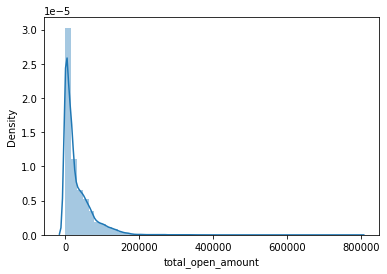

In [61]:
sns.distplot((X_train['total_open_amount']))#Original distribution

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

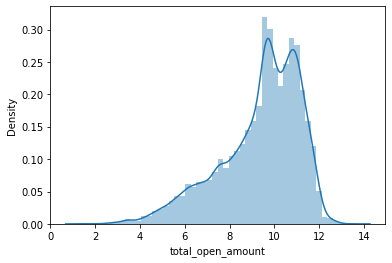

In [62]:
sns.distplot(np.log(X_train['total_open_amount']))#Distribution after log transformation

In [63]:
X_train['total_open_amount']=np.log(X_train['total_open_amount'])#Applying log transformation

In [64]:
X_train.corr()

,total_open_amount,invoice_id,Delay,MED_cust_number,MED_name_customer,MED_cust_payment_terms,MED_Business_code,LE_invoice_currency
total_open_amount,1.000000,0.105073,-0.002871,-0.024542,-0.018717,-0.069118,-0.078300,-0.104997
invoice_id,0.105073,1.000000,-0.131161,-0.188950,-0.169752,-0.222064,-0.754935,-0.999593
Delay,-0.002871,-0.131161,1.000000,0.694211,0.735545,0.596892,0.173821,0.127983
MED_cust_number,-0.024542,-0.188950,0.694211,1.000000,0.924895,0.761299,0.250387,0.184357
MED_name_customer,-0.018717,-0.169752,0.735545,0.924895,1.000000,0.720986,0.219204,0.165829
MED_cust_payment_terms,-0.069118,-0.222064,0.596892,0.761299,0.720986,1.000000,0.280361,0.217257
MED_Business_code,-0.078300,-0.754935,0.173821,0.250387,0.219204,0.280361,1.000000,0.736291
LE_invoice_currency,-0.104997,-0.999593,0.127983,0.184357,0.165829,0.217257,0.736291,1.000000


#### Extracting useful information from Date columns

Till now categorical variables are tackled and one distribution transformation is also done.

Now we need to extract useful information from date columns as we can not input this to our model.

I extracted days,month and quarter of dates in order to get some features.

This might be important as it might depend on some clients that they pay on specific days or in a specific month or in a specific quarter.



In [65]:
X_train['Month_clear_date']=X_train['clear_date'].dt.month#Extracting month from clear_date
X_test['Month_clear_date']=X_test['clear_date'].dt.month#Extracting month from clear_date
X_val['Month_clear_date']=X_val['clear_date'].dt.month#Extracting month from clear_date

X_train['Day_clear_date']=X_train['clear_date'].dt.day#Extracting day from clear_date
X_test['Day_clear_date']=X_test['clear_date'].dt.day#Extracting day from clear_date
X_val['Day_clear_date']=X_val['clear_date'].dt.day#Extracting day from clear_date

X_train['Quarter_clear_date']=X_train['clear_date'].dt.quarter#Extracting quarter from clear_date
X_test['Quarter_clear_date']=X_test['clear_date'].dt.quarter#Extracting quarter from clear_date
X_val['Quarter_clear_date']=X_val['clear_date'].dt.quarter#Extracting quarter from clear_date

X_train['Weekday_clear_date']=X_train['clear_date'].dt.weekday#Extracting weekday from clear_date
X_test['Weekday_clear_date']=X_test['clear_date'].dt.weekday#Extracting weekday from clear_date
X_val['Weekday_clear_date']=X_val['clear_date'].dt.weekday#Extracting weekday from clear_date

X_train['Month_due_date']=X_train['due_in_date'].dt.month#Extracting month from due_in_date
X_test['Month_due_date']=X_test['due_in_date'].dt.month#Extracting month from due_in_date
X_val['Month_due_date']=X_val['due_in_date'].dt.month#Extracting month from due_in_date

X_train['Day_due_date']=X_train['due_in_date'].dt.day#Extracting day from due_in_date
X_test['Day_due_date']=X_test['due_in_date'].dt.day#Extracting day from due_in_date
X_val['Day_due_date']=X_val['due_in_date'].dt.day#Extracting day from due_in_date

X_train['Quarter_due_date']=X_train['due_in_date'].dt.quarter#Extracting quarter from due_in_date
X_test['Quarter_due_date']=X_test['due_in_date'].dt.quarter#Extracting quarter from due_in_date
X_val['Quarter_due_date']=X_val['due_in_date'].dt.quarter#Extracting quarter from due_in_date

X_train['Weekday_due_date']=X_train['due_in_date'].dt.weekday#Extracting weekday from due_in_date
X_test['Weekday_due_date']=X_test['due_in_date'].dt.weekday#Extracting weekday from due_in_date
X_val['Weekday_due_date']=X_val['due_in_date'].dt.weekday#Extracting weekday from due_in_date

In [66]:
X_train.head()#Displaying training data after extracting days,weekday,month and quarter from essential dates

,clear_date,posting_date,document_create_date,due_in_date,total_open_amount,invoice_id,Delay,MED_cust_number,MED_name_customer,MED_cust_payment_terms,MED_Business_code,LE_invoice_currency,Month_clear_date,Day_clear_date,Quarter_clear_date,Weekday_clear_date,Month_due_date,Day_due_date,Quarter_due_date,Weekday_due_date
10848,2019-01-09,2018-12-30,2018-12-29,2019-01-14,10.833712,1.928541e+09,5,2.013826,2.171527,1.686214,-0.534814,1,1,9,1,2,1,14,1,0
37396,2019-01-22,2018-12-30,2018-12-29,2019-01-14,10.263411,1.928534e+09,-8,-1.169972,-1.897727,1.686214,-0.534814,1,1,22,1,1,1,14,1,0
45926,2019-01-15,2018-12-30,2018-12-29,2019-01-14,4.063542,1.928540e+09,-1,-0.935924,-0.967742,-1.265743,-0.534814,1,1,15,1,1,1,14,1,0
9620,2019-01-18,2018-12-30,2018-12-31,2019-01-14,6.510110,1.928531e+09,-4,-0.727273,-2.333333,-1.265743,-0.534814,1,1,18,1,4,1,14,1,0
27571,2019-01-09,2018-12-30,2018-12-29,2019-01-14,11.197123,1.928542e+09,5,2.013826,2.262681,1.686214,-0.534814,1,1,9,1,2,1,14,1,0


In [67]:
X_train.corr()#Displaying correlation matrix for a quick correlation check after extracting several features

,total_open_amount,invoice_id,Delay,MED_cust_number,MED_name_customer,MED_cust_payment_terms,MED_Business_code,LE_invoice_currency,Month_clear_date,Day_clear_date,Quarter_clear_date,Weekday_clear_date,Month_due_date,Day_due_date,Quarter_due_date,Weekday_due_date
total_open_amount,1.000000,0.105073,-0.002871,-0.024542,-0.018717,-0.069118,-0.078300,-0.104997,-0.008691,0.023181,-0.004279,0.022495,-0.005885,-0.006648,-0.003768,0.022106
invoice_id,0.105073,1.000000,-0.131161,-0.188950,-0.169752,-0.222064,-0.754935,-0.999593,0.020166,0.010972,0.019833,0.032815,0.003643,-0.003911,0.004456,0.024221
Delay,-0.002871,-0.131161,1.000000,0.694211,0.735545,0.596892,0.173821,0.127983,-0.099784,-0.044794,-0.087063,-0.079481,0.030789,0.019101,0.031476,-0.011739
MED_cust_number,-0.024542,-0.188950,0.694211,1.000000,0.924895,0.761299,0.250387,0.184357,-0.086020,-0.055871,-0.065491,-0.169286,0.002926,0.003046,0.007555,-0.002001
MED_name_customer,-0.018717,-0.169752,0.735545,0.924895,1.000000,0.720986,0.219204,0.165829,-0.085989,-0.050581,-0.066852,-0.155092,0.008840,0.003701,0.012452,-0.004261
MED_cust_payment_terms,-0.069118,-0.222064,0.596892,0.761299,0.720986,1.000000,0.280361,0.217257,-0.043161,-0.068082,-0.024390,-0.213390,0.030962,0.003354,0.033732,0.002909
MED_Business_code,-0.078300,-0.754935,0.173821,0.250387,0.219204,0.280361,1.000000,0.736291,-0.040957,-0.030403,-0.039496,-0.054478,-0.020640,0.002948,-0.019590,-0.016475
LE_invoice_currency,-0.104997,-0.999593,0.127983,0.184357,0.165829,0.217257,0.736291,1.000000,-0.017632,-0.010109,-0.017409,-0.031562,-0.001438,0.003859,-0.002373,-0.024288
Month_clear_date,-0.008691,0.020166,-0.099784,-0.086020,-0.085989,-0.043161,-0.040957,-0.017632,1.000000,-0.119244,0.956571,0.000755,0.985707,-0.076235,0.941401,-0.001877
Day_clear_date,0.023181,0.010972,-0.044794,-0.055871,-0.050581,-0.068082,-0.030403,-0.010109,-0.119244,1.000000,-0.114795,0.014794,-0.076137,0.556133,-0.067772,0.002582


In [68]:
#Dropping original date columns and redundant columns
X_train=X_train.drop(['clear_date','posting_date','document_create_date','due_in_date','invoice_id'],axis=1)
X_test=X_test.drop(['clear_date','posting_date','document_create_date','due_in_date','invoice_id'],axis=1)
X_val=X_val.drop(['clear_date','posting_date','document_create_date','due_in_date','invoice_id'],axis=1)

### Feature Selection

                    "With great feature engineering comes great feature selection"
                                                                                -TPMG

Now we have extracted several features using feature engineering techniques and now before feeding these features to the model we need to know which features will work properly and which features are redundant.

First I used correlation matrix to find out highly correlated features and dropped one of them as both are providing the same information to the model.

Then I used univariate feature selection:SelectKbest and f_regression from sklearn to get scores and mutual_info_regression to find out mutual dependency of variables.

After that I used feature importance using randomforrestregressor to finally find out which features are important for the model.

In [69]:
X_train=X_train.drop(['Delay'],axis=1)#dropping target vector from training dataset

In [70]:
X_train.head()#displaying training dataset with features and without Delay

,total_open_amount,MED_cust_number,MED_name_customer,MED_cust_payment_terms,MED_Business_code,LE_invoice_currency,Month_clear_date,Day_clear_date,Quarter_clear_date,Weekday_clear_date,Month_due_date,Day_due_date,Quarter_due_date,Weekday_due_date
10848,10.833712,2.013826,2.171527,1.686214,-0.534814,1,1,9,1,2,1,14,1,0
37396,10.263411,-1.169972,-1.897727,1.686214,-0.534814,1,1,22,1,1,1,14,1,0
45926,4.063542,-0.935924,-0.967742,-1.265743,-0.534814,1,1,15,1,1,1,14,1,0
9620,6.510110,-0.727273,-2.333333,-1.265743,-0.534814,1,1,18,1,4,1,14,1,0
27571,11.197123,2.013826,2.262681,1.686214,-0.534814,1,1,9,1,2,1,14,1,0


#### Correlation based filtering

Here I found out which features are highly correlated then dropped one of them as they both provide the same information to the model.

<AxesSubplot:>

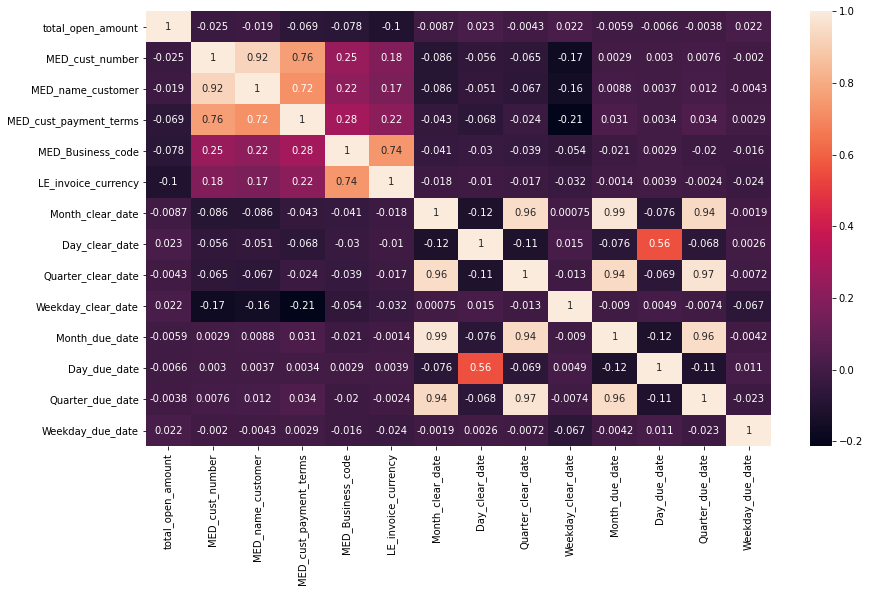

In [71]:
#Displaying heatmap of correlation matrix in order analyse highly correlated variables
corr=X_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [72]:
#Here this function is used to find out highly correlated features
def tackle_corr(df,threshold):
    corr_features = set()#set to hold correlated features
    corr_matrix = df.corr()#correlation matrix
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [73]:
tackle_corr(X_train,0.9)#threshold values is 0.9 hence all highly correlated features with more than 0.9

['Quarter_due_date',
 'Quarter_clear_date',
 'Month_due_date',
 'MED_name_customer']

In [74]:
#Now dropping highly correlated features from training,testing and validation datasets
X_train=X_train.drop(['Month_due_date','Quarter_due_date',
                      'Quarter_clear_date','MED_name_customer'],axis=1)
X_test=X_test.drop(['Month_due_date','Quarter_due_date',
                      'Quarter_clear_date','MED_name_customer'],axis=1)
X_val=X_val.drop(['Month_due_date','Quarter_due_date',
                      'Quarter_clear_date','MED_name_customer'],axis=1)

In [75]:
tackle_corr(X_train,0.9)#Checking again for highly correlated features

[]

#### Univariate feature selection and mutual info

Used f_regression and mutual_info_regression from sklearn library.

First found out the scores and dependency of each feature.

Then dropped less important features with less scores.

In [76]:
X_train.shape#Shape to find out the number of features:10

(27373, 10)

In [77]:
ordered_rank_features=SelectKBest(score_func=f_regression,k=10)#Creating object of SelectKbest with score parameters and number of features=10
ordered_feature=ordered_rank_features.fit(X_train,y_train)#fitting the object to find out the score

In [78]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])#Converting Scores to dataframe.
dfcolumns=pd.DataFrame(X_train.columns)#Creating dataframe of column names of X_train.

In [79]:
feature_rank=pd.concat([dfcolumns,dfscores],axis=1)#Merged the scores and column names.

In [80]:
feature_rank.columns=['Features','Scores']#Feature rank dataframe column names

In [81]:
feature_rank.nlargest(10,'Scores')#Displaying top 10 features with highest scores.

,Features,Scores
1,MED_cust_number,25461.497151
2,MED_cust_payment_terms,15149.054532
3,MED_Business_code,852.747080
4,LE_invoice_currency,455.792873
5,Month_clear_date,275.268307
7,Weekday_clear_date,174.010285
6,Day_clear_date,55.029715
8,Day_due_date,9.989561
9,Weekday_due_date,3.772486
0,total_open_amount,0.225565


In [82]:
ordered_rank_features_1=SelectKBest(score_func=mutual_info_regression,k=10)#Mutual_info_regression object
ordered_feature_1=ordered_rank_features_1.fit(X_train,y_train)#fitting it to X_train and y_train
dfscores_1=pd.DataFrame(ordered_feature_1.scores_,columns=['Score'])#Converting Scores to dataframe.
dfcolumns_1=pd.DataFrame(X_train.columns)#Creating dataframe of column names of X_train.
feature_rank_1=pd.concat([dfcolumns_1,dfscores_1],axis=1)#Merged the scores and column names.
feature_rank_1.columns=['Features','Scores']#Feature rank dataframe column names

In [83]:
feature_rank_1.nlargest(10,'Scores')#Displaying top 10 features with highest scores.

,Features,Scores
1,MED_cust_number,0.833720
2,MED_cust_payment_terms,0.581242
9,Weekday_due_date,0.425337
0,total_open_amount,0.109898
7,Weekday_clear_date,0.100335
8,Day_due_date,0.091795
6,Day_clear_date,0.085221
3,MED_Business_code,0.062149
4,LE_invoice_currency,0.054508
5,Month_clear_date,0.048038


#### Feature importance

I used RandomForestRegressor to find the important features.

In [84]:
model=RandomForestRegressor()#Creating object of RandomForestRegressor()
model.fit(X_train,y_train)#Fitting it on X_train andy_train

RandomForestRegressor()

<AxesSubplot:>

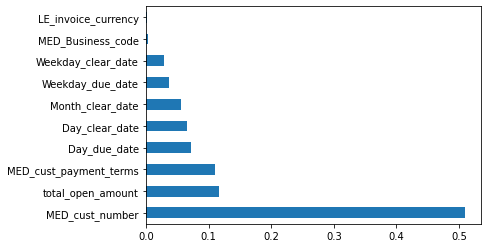

In [85]:
ranked_feat=pd.Series(model.feature_importances_,index=X_train.columns)#converting feature importance to series 
ranked_feat.nlargest(10).plot(kind='barh')#displaying top 10 important features.

In [86]:
#Dropping less important columns after analysing univariate selection scores and feature importance
X_train=X_train.drop(['LE_invoice_currency','Month_clear_date','Day_clear_date','Weekday_clear_date','MED_Business_code'],axis=1)
X_test=X_test.drop(['LE_invoice_currency','Month_clear_date','Day_clear_date','Weekday_clear_date','MED_Business_code'],axis=1)
X_val=X_val.drop(['LE_invoice_currency','Month_clear_date','Day_clear_date','Weekday_clear_date','MED_Business_code'],axis=1)

In [87]:
X_train.corr()#Final features for the model

,total_open_amount,MED_cust_number,MED_cust_payment_terms,Day_due_date,Weekday_due_date
total_open_amount,1.000000,-0.024542,-0.069118,-0.006648,0.022106
MED_cust_number,-0.024542,1.000000,0.761299,0.003046,-0.002001
MED_cust_payment_terms,-0.069118,0.761299,1.000000,0.003354,0.002909
Day_due_date,-0.006648,0.003046,0.003354,1.000000,0.010826
Weekday_due_date,0.022106,-0.002001,0.002909,0.010826,1.000000


# Milestone-3
## Build Predictive Model


A randomforest regressor fits a number of classifying decision trees on many sub-samples of the dataset.It uses averaging to improve the predictive accuracy and control over-fitting.

Since when we calculated the correlation between target variable and features I found out that not many features are linearly correlated with the target so linear regression will not work with this dataset.I decided to use Random Forrest as it is a tree based bagging technique in which row sampling and feature sampling is done internally and it uses bootstrapping and aggregation for predicting the output from several decision trees.

Random forest decreases high variance of a single decision tree to low variance by bootstrapping and aggregation hence I used this estimator to control overfitting and reduce high variance.

First train the base model without any hyperparameter tuning and calculate rmse and r squared score.

Then performed randomized search cross validation to find out the range of hyperparameters which can give good accuracy for our model.

After hyperparameter tuning I used these hyperparameters to minimize the rmse and r squared score.

Parameters used are 

n_estimators=200,criterion='mae',max_depth=52,max_features='log2',min_samples_leaf=2,min_samples_split=12.

200 decision trees will be used.

Mean absolute error will be the metrics to measure the quality of split.

The maximum depth of tree is 52.

Minimum 12 number of samples are required to split an internal node.
 
The minimum number of 2 samples are required to be at a leaf node.

The number of 12 features are considered when looking for the best split


In [88]:
#Creating a base model without hyperparameter tuning and getting rmse as 6.047 and r squared as 0.2355
base_model=RandomForestRegressor(n_estimators=20)
base_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20)

In [89]:
y_predict=base_model.predict(X_val)#predicting validation data for hyperparameter tuning 

In [90]:
base_model_error=mean_squared_error(y_val, y_predict,squared=False)
print(base_model_error)#mean squared error
print(r2_score(y_val, y_predict))#r squared score

6.454844452450434
0.1291305603247641


In [91]:
y_predict_test=base_model.predict(X_test) #Calculating error on test dataset
mean_squared_error(y_test, y_predict_test, squared=False)#Calculating error on test dataset

7.900443576384845

#### RandomizedSearchCV

Randomizedsearchcv samples the parameter values and use it in the model to find out the range of values in which best hyperparameter values can exist.


Then Gridsearchcv is performed in order to to bruteforce that range of parameters in the model and check for each hyperparameter value and give the sweet spot of hyperparameters.

Note: Due to computational resources randomizedsearchcv was taking around 10 to 20 minutes for a single iteration hence I skipped the gridsearchcv and implemented randomized search cross validation for few iterations.After running it for few iterations also helped in reducing the error and improved r squared score.

In [92]:
#Creating a grid of parameters to be fed into RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=5,stop=200,num=5)]#Values for n_estimators
max_features=['auto','sqrt','log2']#Values for max_features
max_depth=[int(x) for x in linspace(5,100,5)]#Values for max_depth
min_samples_split=[2,6,10,12]#Values for min_samples_split
min_samples_leaf=[2,4,6,10]#Values for min_samples_leaf
criterion=['mse','mae']#Values for criterion
#Now creating a dictionary or grid of our hyperparameter values
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
print (random_grid)

{'n_estimators': [5, 53, 102, 151, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 28, 52, 76, 100], 'min_samples_split': [2, 6, 10, 12], 'min_samples_leaf': [2, 4, 6, 10], 'criterion': ['mse', 'mae']}


##### 
Now implementing RandomizedSearchCV


Most important parameters are n_iter and cv:n_iter is number of iteration and cv is cross validation

n_iter=2 as computational resources will not allow to run for more number of iterations.

cv=2 cross validation of 2.

n_jobs=-1 indicates to use all cpu cores of the system

In [91]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=2,cv=2,random_state=100 ,verbose=3,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

NameError: name 'random_grid' is not defined

In [93]:
rf_randomcv.best_params_#Now getting best parameters for the model 

NameError: name 'rf_randomcv' is not defined

In [94]:
#Now fitting the model to the best estimator after implementing randomizedsearchcv
rf_best_model=RandomForestRegressor(n_estimators=200,min_samples_split=12,min_samples_leaf=2,
                                   max_features='log2',max_depth=52,criterion='mae')
rf_best_model.fit(X_train,y_train)#Fitting X_train and y_train

RandomForestRegressor(criterion='mae', max_depth=52, max_features='log2',
                      min_samples_leaf=2, min_samples_split=12,
                      n_estimators=200)

In [95]:
y_predict_rf=rf_best_model.predict(X_val)
print(mean_squared_error(y_val, y_predict_rf,squared=False))#mean squared error
print(r2_score(y_val, y_predict_rf))#r squared score

5.586831772267669
0.34760191598919643


#### Comparison of base model and tuned model

RMSE of base model=6.894457533807547

RMSE of tuned model=5.591011669916137

R-squared score of base model=0.006468387614591897

R-squared score of tuned model=0.34662534198745276

On testing dataset :
RMSE of base model=8.22338889823336

RMSE of tuned model=7.446367085750041

As we can see error is reduced upto some extent and r squared score also increased after implementing RandomizedSearchCV.

In [96]:
#Comparing perfomance of base model and tuned model
increase_in_r2=(r2_score(y_val,y_predict_rf)-r2_score(y_val,y_predict))
print("R-squared score increased by :",increase_in_r2)

R-squared score increased by : 0.21847135566443232


In [97]:
y_predict_test_rf=rf_best_model.predict(X_test) #Calculating error on test dataset
mean_squared_error(y_test, y_predict_test_rf, squared=False)#Calculating error on test dataset

7.41239924923006

In [98]:
#Displaying predicted values vs actual values
df_pred_act = pd.DataFrame(zip((y_predict_test_rf).astype(int) , y_test),columns=['Predicted','Actuals'])
df_pred_act.head(10)

,Predicted,Actuals
0,0,0
1,4,2
2,0,-1
3,4,-2
4,2,1
5,-5,-1
6,4,2
7,-2,-2
8,1,-1
9,4,5


### Main Testing Dataset

Now the task is to predict the payment date on unseen data in which payment is due and bucketize the delay in payment.

First step is to perform all the feature engineering steps on this dataset and bring it in format of X_train in order to predict the delay in days using tuned model.

Then convert the predicted delay to timedelta format in order to add it to due_in_date to get the predicted payment date.

After that bucketize the delay of payment in days according to PRS:
If payment is done before the due date : <0 days

If the payment is done between 0 to 15 days of due date: 15 days

If the payment is done between 15 to 30 days of due date: 30 days

If the payment is done between 30 to 45 days :45 days

After that add it to the final dataset which includes predicted payment date.

In [99]:
T=df_test

In [100]:
df_test.head()#Displaying main test dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen
5,U001,0200749782,KROG llc,NaT,2020,2020-04-27,2020-04-27,2020-05-12,USD,14937.09,NAA8,1.930830e+09,1
11,U001,0200726979,BJ'S co,NaT,2020,2020-03-01,2020-02-29,2020-03-16,USD,557.64,NAA8,1.930585e+09,1
27,CA02,0140104429,COSTCO us,NaT,2020,2020-04-28,2020-04-28,2020-05-17,CAD,44433.78,CA10,2.960632e+09,1
33,CA02,0140104225,SAVE-ON- foundation,NaT,2020,2020-04-29,2020-04-29,2020-05-18,CAD,175961.87,CA10,2.960631e+09,1
35,U001,0200726979,BJ'S us,NaT,2020,2020-03-19,2020-03-20,2020-04-03,USD,361.27,NAA8,1.930675e+09,1


In [101]:
df_test.isnull().sum()#Checking for null values in testing dataset

business_code              0
cust_number                0
name_customer              0
clear_date              9701
buisness_year              0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
cust_payment_terms         0
invoice_id                 0
isOpen                     0
dtype: int64

In [102]:
X_main_test=df_test.drop(['clear_date'],axis=1)#Dropping null column

In [103]:
#Applying same feature enginering steps
#Dropping all columns which were dropped in X_train
X_main_test=X_main_test.drop(['isOpen','name_customer','buisness_year',
                              'posting_date','document_create_date',
                              'invoice_id','invoice_currency','business_code'],axis=1)

In [104]:
#Mean encoding the categorical columns which were used as features for training dataset
X_main_test['MED_cust_number']=X_main_test['cust_number'].map(means_CN)
X_main_test['MED_cust_payment_terms']=X_main_test['cust_payment_terms'].map(means_CPT)

In [105]:
#Extracting day and weekday of due date from columns: same as training dataset
X_main_test['Day_due_date']=X_main_test['due_in_date'].dt.day
X_main_test['Weekday_due_date']=X_main_test['due_in_date'].dt.weekday

In [106]:
#Dropping original columns after mapping mean encoding from training dataset
X_main_test=X_main_test.drop(['cust_number','cust_payment_terms',
                              'due_in_date'],axis=1)

In [107]:
X_main_test.isnull().sum()#Checking for null values after mean encoding

total_open_amount           0
MED_cust_number           105
MED_cust_payment_terms     52
Day_due_date                0
Weekday_due_date            0
dtype: int64

In [108]:
#filling null values with mode as it was done in training dataset
X_main_test['MED_cust_number']=np.where(X_main_test['MED_cust_number'].isnull(),X_main_test['MED_cust_number'].mode(),X_main_test['MED_cust_number'])
X_main_test['MED_cust_payment_terms']=np.where(X_main_test['MED_cust_payment_terms'].isnull(),X_main_test['MED_cust_payment_terms'].mode(),X_main_test['MED_cust_payment_terms'])

In [109]:
X_train.head()#Displaying training dataset

,total_open_amount,MED_cust_number,MED_cust_payment_terms,Day_due_date,Weekday_due_date
10848,10.833712,2.013826,1.686214,14,0
37396,10.263411,-1.169972,1.686214,14,0
45926,4.063542,-0.935924,-1.265743,14,0
9620,6.510110,-0.727273,-1.265743,14,0
27571,11.197123,2.013826,1.686214,14,0


In [110]:
X_main_test.head()#Displaying testing dataset

,total_open_amount,MED_cust_number,MED_cust_payment_terms,Day_due_date,Weekday_due_date
5,14937.09,-0.344828,-1.265743,12,1
11,557.64,-0.935924,-1.265743,16,0
27,44433.78,-3.854772,-6.231481,17,6
33,175961.87,-3.066667,-6.231481,18,0
35,361.27,-0.935924,-1.265743,3,4


In [111]:
final_result=rf_best_model.predict(X_main_test)#Using tuned model to predict delay from testinng dataset

In [112]:
#Converting to pd.series in order to add it to Final dataframe
final_result=pd.Series(final_result,name='Predicted_payment_date').astype(int)


In [113]:
final_result.unique()#Checking unique values 

array([  1,   0,  -1,   4,   3,   2,  -5,   7,  -2,  -4,  -3,  39,   6,
       -10,  20,  15,   8,  40, -48, -47,  36, -44,  -9,  -6,  -8,  18,
       -12,  14, -39, -11,  16,  -7, -42, -14, -63,   5,  24,  41, -51,
        28, -84,  34,  37,  10, -46,  38,  23, -35,   9, -60, -76, -37,
        17, -13, -36,  11, -57, -49, -23,  13, -24, -25, -59,  35,  31,
        12, -40, -61,  30, -22, -53, -19,  32,  21,  19])

In [114]:
df_test.reset_index(drop=True,inplace=True)#Resetting index in order to merge final_result

In [136]:
#Adding final_result that is predicted delay in main testing dataset and storing it in Final
Final = df_test.merge(final_result , on = X_main_test.index )

In [137]:
Final.head()#Displaying Final dataset with predicted delay in payment

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen,Predicted_payment_date
0,5,U001,0200749782,KROG llc,NaT,2020,2020-04-27,2020-04-27,2020-05-12,USD,14937.09,NAA8,1.930830e+09,1,1
1,11,U001,0200726979,BJ'S co,NaT,2020,2020-03-01,2020-02-29,2020-03-16,USD,557.64,NAA8,1.930585e+09,1,0
2,27,CA02,0140104429,COSTCO us,NaT,2020,2020-04-28,2020-04-28,2020-05-17,CAD,44433.78,CA10,2.960632e+09,1,-1
3,33,CA02,0140104225,SAVE-ON- foundation,NaT,2020,2020-04-29,2020-04-29,2020-05-18,CAD,175961.87,CA10,2.960631e+09,1,0
4,35,U001,0200726979,BJ'S us,NaT,2020,2020-03-19,2020-03-20,2020-04-03,USD,361.27,NAA8,1.930675e+09,1,0


#### 
Now we have predicted delay in final dataset.

We need to add this predicted delay to due date in order to get the predicted payment date.

After getting predicted payment date we need to merge it with final dataset.

Then bucketize the delay according to PRS.

In [138]:
#Adding delay to due_in_date to get predicted payment date
#Converted predicted delay to timedelta format in order to add it to due_in_date
Final['Predicted_payment_date']=Final['due_in_date']+pd.to_timedelta(Final['Predicted_payment_date'],unit='d')

In [139]:
Final.head(10)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen,Predicted_payment_date
0,5,U001,0200749782,KROG llc,NaT,2020,2020-04-27,2020-04-27,2020-05-12,USD,14937.09,NAA8,1.930830e+09,1,2020-05-13
1,11,U001,0200726979,BJ'S co,NaT,2020,2020-03-01,2020-02-29,2020-03-16,USD,557.64,NAA8,1.930585e+09,1,2020-03-16
2,27,CA02,0140104429,COSTCO us,NaT,2020,2020-04-28,2020-04-28,2020-05-17,CAD,44433.78,CA10,2.960632e+09,1,2020-05-16
3,33,CA02,0140104225,SAVE-ON- foundation,NaT,2020,2020-04-29,2020-04-29,2020-05-18,CAD,175961.87,CA10,2.960631e+09,1,2020-05-18
4,35,U001,0200726979,BJ'S us,NaT,2020,2020-03-19,2020-03-20,2020-04-03,USD,361.27,NAA8,1.930675e+09,1,2020-04-03
5,39,U001,0200769623,WAL-MAR corporation,NaT,2020,2020-03-29,2020-03-28,2020-04-13,USD,9455.23,NAH4,1.930715e+09,1,2020-04-17
6,45,U001,0200769623,WAL-MAR trust,NaT,2020,2020-03-06,2020-03-05,2020-03-21,USD,39741.40,NAH4,1.930606e+09,1,2020-03-24
7,48,U001,0200762301,C&S WH trust,NaT,2020,2020-04-06,2020-04-06,2020-04-21,USD,33751.39,NAC6,1.930752e+09,1,2020-04-22
8,52,U001,0200762301,C&S WH us,NaT,2020,2020-04-05,2020-04-04,2020-04-20,USD,7996.49,NAC6,1.930748e+09,1,2020-04-20
9,65,U001,0200748108,KROGER llc,NaT,2020,2020-03-03,2020-03-02,2020-03-18,USD,64138.07,NAA8,1.930593e+09,1,2020-03-19


In [140]:
#Adding a bucket column in final dataset
Final['Bucket']=(Final['Predicted_payment_date']-Final['due_in_date']).dt.days

In [141]:
#Using pd.cut to bucketize the delay in payment date
bins=[-np.inf,0,15,30,45]#Creating a bin of numbers on basis of which we are supposed to bucketize the delay
names=['< 0 days','15 days','30 days','45 days']#Name of buckets
Final['Bucket Range']=pd.cut(Final['Bucket'],bins,labels=names)#Implementing pd.cut

In [142]:
Final['Bucket Range'].value_counts()#Checking for value counts of each bucket

15 days     5801
< 0 days    3761
45 days      102
30 days       37
Name: Bucket Range, dtype: int64

In [143]:
Final=Final.drop(['Bucket'],axis=1)#Dropping the bucket or predicted delay column from dataset

In [144]:
Final.head()#Displaying the final dataset

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen,Predicted_payment_date,Bucket Range
0,5,U001,0200749782,KROG llc,NaT,2020,2020-04-27,2020-04-27,2020-05-12,USD,14937.09,NAA8,1.930830e+09,1,2020-05-13,15 days
1,11,U001,0200726979,BJ'S co,NaT,2020,2020-03-01,2020-02-29,2020-03-16,USD,557.64,NAA8,1.930585e+09,1,2020-03-16,< 0 days
2,27,CA02,0140104429,COSTCO us,NaT,2020,2020-04-28,2020-04-28,2020-05-17,CAD,44433.78,CA10,2.960632e+09,1,2020-05-16,< 0 days
3,33,CA02,0140104225,SAVE-ON- foundation,NaT,2020,2020-04-29,2020-04-29,2020-05-18,CAD,175961.87,CA10,2.960631e+09,1,2020-05-18,< 0 days
4,35,U001,0200726979,BJ'S us,NaT,2020,2020-03-19,2020-03-20,2020-04-03,USD,361.27,NAA8,1.930675e+09,1,2020-04-03,< 0 days


## End of notebook !! :D

Implemented basic data pre-processing steps along with data cleaning steps.

Implemented exploratory data analysis and visualized distributions and spread of target variable.

Implemented feature engineering and extracted useful features from the data and understood underlying patterns of the data.

Implemented feature selection in order to get the useful features and reduced dimensionality of data upto some extent in order to get the desired accuracy.

Implemented model building by using RandomForrest Regressor.

Implemented hyperparameter tuning in order to reduce the mean squared error and increase the r-squared score.

Predicted payment date and bucket range of delay in payment on the unseen data.


In [145]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen,Predicted_payment_date,Bucket Range
0,5,U001,0200749782,KROG llc,NaT,2020,2020-04-27,2020-04-27,2020-05-12,USD,14937.09,NAA8,1.930830e+09,1,2020-05-13,15 days
1,11,U001,0200726979,BJ'S co,NaT,2020,2020-03-01,2020-02-29,2020-03-16,USD,557.64,NAA8,1.930585e+09,1,2020-03-16,< 0 days
2,27,CA02,0140104429,COSTCO us,NaT,2020,2020-04-28,2020-04-28,2020-05-17,CAD,44433.78,CA10,2.960632e+09,1,2020-05-16,< 0 days
3,33,CA02,0140104225,SAVE-ON- foundation,NaT,2020,2020-04-29,2020-04-29,2020-05-18,CAD,175961.87,CA10,2.960631e+09,1,2020-05-18,< 0 days
4,35,U001,0200726979,BJ'S us,NaT,2020,2020-03-19,2020-03-20,2020-04-03,USD,361.27,NAA8,1.930675e+09,1,2020-04-03,< 0 days


In [146]:
Final=Final.drop(['cust_payment_terms','clear_date','buisness_year','posting_date','document_create_date','invoice_currency','isOpen','Bucket Range','business_code','key_0'],axis=1)

In [147]:
Final.head()

,cust_number,name_customer,due_in_date,total_open_amount,invoice_id,Predicted_payment_date
0,0200749782,KROG llc,2020-05-12,14937.09,1.930830e+09,2020-05-13
1,0200726979,BJ'S co,2020-03-16,557.64,1.930585e+09,2020-03-16
2,0140104429,COSTCO us,2020-05-17,44433.78,2.960632e+09,2020-05-16
3,0140104225,SAVE-ON- foundation,2020-05-18,175961.87,2.960631e+09,2020-05-18
4,0200726979,BJ'S us,2020-04-03,361.27,1.930675e+09,2020-04-03


In [148]:
Final=Final.rename(columns={"cust_number":"Customer #","name_customer":"Customer name","due_in_date":"Due Date",
                      "total_open_amount":"Invoice amount","Predicted_payment_date":"Predicted Payment Date",
                     "invoice_id":"Invoice #"})

In [149]:
Final

,Customer #,Customer name,Due Date,Invoice amount,Invoice #,Predicted Payment Date
0,0200749782,KROG llc,2020-05-12,14937.09,1.930830e+09,2020-05-13
1,0200726979,BJ'S co,2020-03-16,557.64,1.930585e+09,2020-03-16
2,0140104429,COSTCO us,2020-05-17,44433.78,2.960632e+09,2020-05-16
3,0140104225,SAVE-ON- foundation,2020-05-18,175961.87,2.960631e+09,2020-05-18
4,0200726979,BJ'S us,2020-04-03,361.27,1.930675e+09,2020-04-03
...,...,...,...,...,...,...
9696,0200759878,SA corp,2020-05-13,29457.70,1.930832e+09,2020-05-13
9697,0200696090,UNITE foundation,2020-04-17,20955.04,1.930712e+09,2020-04-18
9698,0100017545,PERFOR associates,2020-03-17,22480.57,1.930547e+09,2020-03-18
9699,0200769623,WAL-MAR associates,2020-03-25,9802.64,1.930623e+09,2020-03-29


In [151]:
cols = list(Final.columns.values)

In [152]:
cols

['Customer #',
 'Customer name',
 'Due Date',
 'Invoice amount',
 'Invoice #',
 'Predicted Payment Date']

In [153]:
Final = Final[['Customer name', 'Customer #', 'Invoice #', 'Invoice amount', 'Due Date','Predicted Payment Date']]

In [154]:
Final

,Customer name,Customer #,Invoice #,Invoice amount,Due Date,Predicted Payment Date
0,KROG llc,0200749782,1.930830e+09,14937.09,2020-05-12,2020-05-13
1,BJ'S co,0200726979,1.930585e+09,557.64,2020-03-16,2020-03-16
2,COSTCO us,0140104429,2.960632e+09,44433.78,2020-05-17,2020-05-16
3,SAVE-ON- foundation,0140104225,2.960631e+09,175961.87,2020-05-18,2020-05-18
4,BJ'S us,0200726979,1.930675e+09,361.27,2020-04-03,2020-04-03
...,...,...,...,...,...,...
9696,SA corp,0200759878,1.930832e+09,29457.70,2020-05-13,2020-05-13
9697,UNITE foundation,0200696090,1.930712e+09,20955.04,2020-04-17,2020-04-18
9698,PERFOR associates,0100017545,1.930547e+09,22480.57,2020-03-17,2020-03-18
9699,WAL-MAR associates,0200769623,1.930623e+09,9802.64,2020-03-25,2020-03-29


In [156]:
Final.to_csv('Project')

In [159]:
Final.to_csv('Desktop/Project_Index',index=False)